# 数据下载

In [1]:
import os

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm

In [3]:
# 对图片数据进行转换，因为Fashion minist是灰度图，所以使用下面的normalization方式
transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

In [4]:
# 数据下载与封装
train_set = datasets.FashionMNIST('./', download = True, train = True, transform = transform)
test_set = datasets.FashionMNIST('./', download = True, train = False, transform = transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle = True)

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [6]:
# 检查数据
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


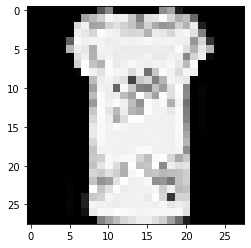

In [7]:
plt.imshow(images[23].numpy().squeeze(), cmap = 'Greys_r')

# DNN神经网络

In [23]:
# Define the network architecture
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )

# Define the loss
# NLLLoss 是似然损失函数的一种，参考：https://zhuanlan.zhihu.com/p/83283586
# 常用在分类任务中
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

# Define the epochs
epochs = 30

train_losses, test_losses = [], []
train_acc, test_acc = [], []
for e in range(epochs):
    running_loss = 0
    epoch_train_acc = 0
    model.train()
    for images, labels in train_loader:
    # Flatten Fashion-MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        epoch_train_acc += torch.mean(equals.type(torch.FloatTensor))
        
        running_loss += loss.item()
    test_loss = 0
    accuracy = 0
    
    with torch.no_grad():
        model.eval()
        for images, labels in test_loader:
            images = images.view(images.shape[0], -1)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)
            
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim = 1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))
    train_acc.append(epoch_train_acc/len(train_loader))
    test_acc.append(accuracy/len(test_loader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(train_loader)),
          "Test loss: {:.3f}..".format(test_loss/len(test_loader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/30.. Training loss: 0.593.. Test loss: 0.455.. Test Accuracy: 0.834
Epoch: 2/30.. Training loss: 0.456.. Test loss: 0.442.. Test Accuracy: 0.836
Epoch: 3/30.. Training loss: 0.420.. Test loss: 0.401.. Test Accuracy: 0.857
Epoch: 4/30.. Training loss: 0.404.. Test loss: 0.382.. Test Accuracy: 0.854


KeyboardInterrupt: 

## 画图

In [32]:
py.init_notebook_mode(connected=True)          #离线绘图时，需要额外进行初始化
import plotly.graph_objs as go                 #创建各类图表
import plotly.figure_factory as ff             #创建table

In [33]:
len(train_acc), len(test_acc)

(30, 30)

In [44]:
t0 = go.Scatter(
    y=np.array(train_acc),
    x=np.array(range(len(train_acc))),
    mode='lines + markers',
    name='train'
)
t1 = go.Scatter(
    y=np.array(test_acc),
    x=np.array(range(len(test_acc))),
    mode='lines + markers',
    name='test'
)
layout = dict(title='Accuracy', xaxis=dict(title='Epochs'), yaxis=dict(title='acc'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data)

In [45]:
# 绘制loss曲线
t0 = go.Scatter(
    y=np.array(train_losses),
    x=np.array(range(len(train_losses))),
    mode='lines + markers',
    name='train loss'
)
t1 = go.Scatter(
    y=np.array(test_losses),
    x=np.array(range(len(test_losses))),
    mode='lines + markers',
    name='test loss'
)
layout = dict(title='Loss', xaxis=dict(title='Epochs'), yaxis=dict(title='loss'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data)

In [36]:
# 绘制acc曲线
trace0 = go.Scatter(
      x = np.linspace(0, 1, 100),
      y = np.random.randn(100) + 5,
      mode = 'lines',
      name = 'line'   
)
trace1 = go.Scatter(
      x = np.linspace(0, 1, 100),
      y = np.random.randn(100),
      mode = 'lines + markers',
      name = 'line + marker'   
)
trace2 = go.Scatter(
      x = np.linspace(0, 1, 100),
      y = np.random.randn(100) - 5,
      mode = 'markers',
      name = 'marker'   
)
data = [trace0, trace1, trace2]

py.iplot(data)

# Resnet神经网络

In [9]:
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

In [10]:
model = torchvision.models.resnet18(pretrained=True)

In [11]:
# TODO:这里的7,7尺寸是什么？
for name, layer in model.named_modules():
    if isinstance(layer, nn.MaxPool2d):
        model.maxpool = nn.AdaptiveAvgPool2d((7, 7))
# 因为数据集是10分类，所以这里设置为10
model.fc.out_features = 10

In [12]:
# 因为resnet不进行修改的话，只能用于彩色图片，所以这里要对数据进行处理
# 我们可以在前面加个卷积核，将通道映射到3，然后输入到resnet中, 也可以直接修改resnet第一层通道为1
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))

In [13]:
# 检查模型是否可以自适应了，发现已经替换完成
# 查看模型, 因为resnet模型对输入的图片尺寸有要求，所以这里要改成自适应
print(model)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), s

In [14]:
batch_size = 128
epochs = 30
lr = 0.001
gamma = 0.9
step_size=5

device_count = torch.cuda.device_count()
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda:0" if USE_CUDA else "cpu")

if device_count > 1:
    model = nn.DataParallel(model,device_ids=range(device_count)) # multi-GPU
    model.to(device)

else:
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=gamma) # 学习方式

# 训练模型
train_acc, test_acc = [], []
train_loss, test_loss = [], []
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for data, label in tqdm(train_loader):
        data = data.cuda()
        label = label.cuda()
        output = model(data)
    
        loss = criterion(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)
        
        data.cpu()
        label.cpu()
        
    with torch.no_grad():
        epoch_test_accuracy = 0
        epoch_test_loss = 0
        for data, label in tqdm(test_loader):
            data = data.cuda()
            label = label.cuda()
            
            test_output = model(data)
            loss = criterion(test_output, label)
            
            acc = (test_output.argmax(dim=1) == label).float().mean()
            epoch_test_accuracy += acc / len(test_loader)
            epoch_test_loss += loss / len(test_loader)
            data.cpu()
            label.cpu()
    scheduler.step()
    
    print(f'EPOCH:{epoch:2}, train loss:{epoch_loss:.4f}, train acc:{epoch_accuracy:.4f}')
    print(f'test loss:{epoch_test_loss:.4f}, test acc:{epoch_test_accuracy:.4f}')

    train_acc.append(epoch_accuracy.item())
    test_acc.append(epoch_test_accuracy.item())
    train_loss.append(epoch_loss.item())
    test_loss.append(epoch_test_loss.item())

  0%|          | 4/938 [00:00<00:29, 31.68it/s]

EPOCH: 0, train loss:0.5510, train acc:0.8140
test loss:0.4261, test acc:0.8459


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 1, train loss:0.3546, train acc:0.8716
test loss:0.3887, test acc:0.8620


  0%|          | 4/938 [00:00<00:29, 31.76it/s]

EPOCH: 2, train loss:0.3156, train acc:0.8859
test loss:0.3052, test acc:0.8891


  0%|          | 4/938 [00:00<00:29, 31.30it/s]

EPOCH: 3, train loss:0.2734, train acc:0.8998
test loss:0.2992, test acc:0.8921


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 4, train loss:0.2404, train acc:0.9107
test loss:0.2840, test acc:0.8954


  0%|          | 4/938 [00:00<00:30, 31.07it/s]

EPOCH: 5, train loss:0.2166, train acc:0.9206
test loss:0.2707, test acc:0.9026


  0%|          | 4/938 [00:00<00:29, 31.74it/s]

EPOCH: 6, train loss:0.1889, train acc:0.9295
test loss:0.2596, test acc:0.9040


  0%|          | 4/938 [00:00<00:30, 31.12it/s]

EPOCH: 7, train loss:0.1670, train acc:0.9370
test loss:0.2659, test acc:0.9067


  0%|          | 3/938 [00:00<00:33, 28.31it/s]

EPOCH: 8, train loss:0.1412, train acc:0.9467
test loss:0.2670, test acc:0.9108


  0%|          | 4/938 [00:00<00:29, 31.72it/s]

EPOCH: 9, train loss:0.1163, train acc:0.9568
test loss:0.2827, test acc:0.9127


  0%|          | 4/938 [00:00<00:29, 31.77it/s]

EPOCH:10, train loss:0.1017, train acc:0.9619
test loss:0.2789, test acc:0.9119


  0%|          | 4/938 [00:00<00:29, 31.14it/s]

EPOCH:11, train loss:0.0728, train acc:0.9730
test loss:0.3026, test acc:0.9126


  0%|          | 4/938 [00:00<00:29, 31.73it/s]

EPOCH:12, train loss:0.0595, train acc:0.9779
test loss:0.3221, test acc:0.9160


  0%|          | 4/938 [00:00<00:29, 31.48it/s]

EPOCH:13, train loss:0.0454, train acc:0.9832
test loss:0.3417, test acc:0.9120


  0%|          | 4/938 [00:00<00:29, 31.71it/s]

EPOCH:14, train loss:0.0364, train acc:0.9872
test loss:0.3938, test acc:0.9157


  0%|          | 4/938 [00:00<00:29, 31.68it/s]

EPOCH:15, train loss:0.0274, train acc:0.9900
test loss:0.4277, test acc:0.9155


  0%|          | 4/938 [00:00<00:29, 31.62it/s]

EPOCH:16, train loss:0.0211, train acc:0.9926
test loss:0.4322, test acc:0.9156


  0%|          | 4/938 [00:00<00:29, 31.55it/s]

EPOCH:17, train loss:0.0167, train acc:0.9941
test loss:0.5139, test acc:0.9152


  0%|          | 4/938 [00:00<00:29, 31.59it/s]

EPOCH:18, train loss:0.0127, train acc:0.9953
test loss:0.5086, test acc:0.9164


  0%|          | 4/938 [00:00<00:29, 31.34it/s]

EPOCH:19, train loss:0.0109, train acc:0.9961
test loss:0.5520, test acc:0.9125


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:20, train loss:0.0074, train acc:0.9975
test loss:0.5830, test acc:0.9151


  0%|          | 4/938 [00:00<00:29, 31.52it/s]

EPOCH:21, train loss:0.0045, train acc:0.9986
test loss:0.6528, test acc:0.9176


  0%|          | 4/938 [00:00<00:29, 31.25it/s]

EPOCH:22, train loss:0.0064, train acc:0.9979
test loss:0.6253, test acc:0.9175


  0%|          | 3/938 [00:00<00:31, 29.26it/s]

EPOCH:23, train loss:0.0033, train acc:0.9990
test loss:0.6669, test acc:0.9188


  0%|          | 4/938 [00:00<00:29, 31.70it/s]

EPOCH:24, train loss:0.0034, train acc:0.9990
test loss:0.6594, test acc:0.9181


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:25, train loss:0.0034, train acc:0.9989
test loss:0.6250, test acc:0.9176


  0%|          | 4/938 [00:00<00:29, 31.68it/s]

EPOCH:26, train loss:0.0014, train acc:0.9996
test loss:0.7117, test acc:0.9170


  0%|          | 3/938 [00:00<00:32, 28.40it/s]

EPOCH:27, train loss:0.0013, train acc:0.9995
test loss:0.7437, test acc:0.9187


  0%|          | 4/938 [00:00<00:29, 31.74it/s]

EPOCH:28, train loss:0.0018, train acc:0.9994
test loss:0.7720, test acc:0.9191


100%|██████████| 157/157 [00:02<00:00, 78.37it/s]

EPOCH:29, train loss:0.0006, train acc:0.9998
test loss:0.8451, test acc:0.9181


## 画图

In [20]:
py.init_notebook_mode(connected=True)          #离线绘图时，需要额外进行初始化
import plotly.graph_objs as go                 #创建各类图表
import plotly.figure_factory as ff             #创建table

In [21]:
t0 = go.Scatter(
    y=np.array(train_acc),
    x=np.array(range(len(train_acc))),
    mode='lines + markers',
    name='train'
)
t1 = go.Scatter(
    y=np.array(test_acc),
    x=np.array(range(len(test_acc))),
    mode='lines + markers',
    name='test'
)
layout = dict(title='Accuracy', xaxis=dict(title='Epochs'), yaxis=dict(title='acc'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data)

In [25]:
of.offline.init_notebook_mode(connected=True)
t0 = go.Scatter(
    y=np.array(train_loss),
    x=np.array(range(len(train_loss))),
    mode='lines + markers',
    name='train loss'
)
t1 = go.Scatter(
    y=np.array(test_loss),
    x=np.array(range(len(test_loss))),
    mode='lines + markers',
    name='test loss'
)
layout = dict(title='Loss', xaxis=dict(title='Epochs'), yaxis=dict(title='loss'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data)

# LSTM神经网络

In [13]:
# LSTM做图像分类的原理是什么？
# 依旧是把图像看成一个句子，数据集是28*28的，表示每张图片是长度为28的句子，每个单词可以用长度为28的向量表示

In [9]:
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/recurrent_neural_network/main.py 
# http://colah.github.io/posts/2015-08-Understanding-LSTMs/
# 参考：https://zhuanlan.zhihu.com/p/79064602
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import torch.optim as optim

In [10]:
# 使用LSTM的思路
# 把图片看成一个个句子，图片的尺寸为28*28，图片的长28相当于28个单词，图片的宽28相当于每个单词的向量长度
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 30
learning_rate = 0.01
gamma = 0.9
step_size=5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # 官网默认的输入是seq_len, batch, input_size,这里将batch first=True放在第一个
        # seq len 相当于一句话的长度， input size相当于每个单词的向量长度
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # 初始化两个向量的值, 因为这里是两层的lstm
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # 前向传播，这里只需要out即可
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # 使用全连层进行分类
        out = self.fc(out[:, -1, :])
        return out
    
model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=gamma) # 学习方式
# Train the model
total_step = len(train_loader)
train_acc, test_acc = [], []
train_loss, test_loss = [], []
for epoch in range(num_epochs):
    epoch_accuracy = 0
    epoch_loss = 0
    model.train()
    for i, (images, labels) in enumerate(tqdm(train_loader)):
        # reshape的维度变成了(batch size, 28, 28)
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)
        
    # Test the model
    model.eval()
    with torch.no_grad():
        epoch_test_accuracy = 0
        epoch_test_loss = 0
        for images, labels in tqdm(test_loader):
            images = images.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            acc = (predicted == labels).float().mean()
            epoch_test_accuracy += acc / len(test_loader)
            epoch_test_loss += loss/len(test_loader)

    scheduler.step()
    print(f'EPOCH:{epoch:2}, train loss:{epoch_loss:.4f}, train acc:{epoch_accuracy:.4f}')
    print(f'test acc:{epoch_test_accuracy:.4f}')

    train_acc.append(epoch_accuracy.item())
    test_acc.append(epoch_test_accuracy.item())
    train_loss.append(epoch_loss.item())
    test_loss.append(epoch_test_loss.item())

  1%|          | 6/938 [00:00<00:15, 59.42it/s]

EPOCH: 0, train loss:0.6292, train acc:0.7700
test acc:0.8351


  1%|          | 6/938 [00:00<00:15, 58.69it/s]

EPOCH: 1, train loss:0.4101, train acc:0.8485
test acc:0.8473


  1%|          | 7/938 [00:00<00:15, 61.55it/s]

EPOCH: 2, train loss:0.3642, train acc:0.8642
test acc:0.8591


  1%|          | 6/938 [00:00<00:18, 50.77it/s]

EPOCH: 3, train loss:0.3305, train acc:0.8773
test acc:0.8760


  1%|          | 7/938 [00:00<00:14, 63.91it/s]

EPOCH: 4, train loss:0.3030, train acc:0.8857
test acc:0.8740


  1%|          | 7/938 [00:00<00:14, 62.65it/s]

EPOCH: 5, train loss:0.2816, train acc:0.8942
test acc:0.8850


  1%|          | 7/938 [00:00<00:15, 60.90it/s]

EPOCH: 6, train loss:0.2656, train acc:0.9005
test acc:0.8846


  1%|          | 7/938 [00:00<00:15, 61.01it/s]

EPOCH: 7, train loss:0.2448, train acc:0.9072
test acc:0.8882


  1%|          | 7/938 [00:00<00:13, 67.26it/s]

EPOCH: 8, train loss:0.2296, train acc:0.9132
test acc:0.8910


  1%|          | 7/938 [00:00<00:13, 67.30it/s]

EPOCH: 9, train loss:0.2053, train acc:0.9226
test acc:0.8919


  1%|          | 7/938 [00:00<00:14, 62.79it/s]

EPOCH:10, train loss:0.2120, train acc:0.9207
test acc:0.8852


  1%|          | 6/938 [00:00<00:15, 59.28it/s]

EPOCH:11, train loss:0.1979, train acc:0.9248
test acc:0.8985


  1%|          | 6/938 [00:00<00:15, 58.46it/s]

EPOCH:12, train loss:0.1633, train acc:0.9377
test acc:0.8964


  1%|          | 7/938 [00:00<00:14, 65.36it/s]

EPOCH:13, train loss:0.1451, train acc:0.9461
test acc:0.9033


  1%|          | 6/938 [00:00<00:17, 53.78it/s]

EPOCH:14, train loss:0.1274, train acc:0.9522
test acc:0.9014


  1%|          | 6/938 [00:00<00:17, 53.92it/s]

EPOCH:15, train loss:0.1100, train acc:0.9595
test acc:0.8991


  1%|          | 7/938 [00:00<00:15, 60.65it/s]

EPOCH:16, train loss:0.0957, train acc:0.9653
test acc:0.9012


  1%|          | 7/938 [00:00<00:15, 61.74it/s]

EPOCH:17, train loss:0.0790, train acc:0.9727
test acc:0.9009


  1%|          | 6/938 [00:00<00:16, 58.03it/s]

EPOCH:18, train loss:0.0656, train acc:0.9781
test acc:0.9018


  1%|          | 7/938 [00:00<00:15, 60.69it/s]

EPOCH:19, train loss:0.0550, train acc:0.9820
test acc:0.9012


  1%|          | 7/938 [00:00<00:15, 61.95it/s]

EPOCH:20, train loss:0.0457, train acc:0.9862
test acc:0.9026


  1%|          | 7/938 [00:00<00:14, 62.65it/s]

EPOCH:21, train loss:0.0347, train acc:0.9903
test acc:0.9035


  1%|          | 7/938 [00:00<00:14, 63.77it/s]

EPOCH:22, train loss:0.0273, train acc:0.9932
test acc:0.9010


  1%|          | 7/938 [00:00<00:15, 60.62it/s]

EPOCH:23, train loss:0.0214, train acc:0.9951
test acc:0.8979


  1%|          | 6/938 [00:00<00:17, 52.58it/s]

EPOCH:24, train loss:0.0166, train acc:0.9967
test acc:0.9023


  1%|          | 6/938 [00:00<00:15, 59.17it/s]

EPOCH:25, train loss:0.0134, train acc:0.9978
test acc:0.8989


  1%|          | 6/938 [00:00<00:18, 50.12it/s]

EPOCH:26, train loss:0.0106, train acc:0.9985
test acc:0.9023


  1%|          | 7/938 [00:00<00:14, 63.01it/s]

EPOCH:27, train loss:0.0081, train acc:0.9988
test acc:0.9009


  1%|          | 7/938 [00:00<00:14, 62.27it/s]

EPOCH:28, train loss:0.0065, train acc:0.9993
test acc:0.9028


100%|██████████| 157/157 [00:01<00:00, 118.63it/s]

EPOCH:29, train loss:0.0050, train acc:0.9995
test acc:0.9036


## 画图

In [16]:
py.init_notebook_mode(connected=True)          #离线绘图时，需要额外进行初始化
import plotly.graph_objs as go                 #创建各类图表
import plotly.figure_factory as ff             #创建table

In [17]:
# 绘制准确率曲线
t0 = go.Scatter(
    y=np.array(train_acc),
    x=np.array(range(len(train_acc))),
    mode='lines + markers',
    name='train'
)
t1 = go.Scatter(
    y=np.array(test_acc),
    x=np.array(range(len(test_acc))),
    mode='lines + markers',
    name='test'
)
layout = dict(title='Accuracy', xaxis=dict(title='Epochs'), yaxis=dict(title='acc'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data)

In [22]:
# 绘制loss曲线
t0 = go.Scatter(
    y=np.array(train_loss),
    x=np.array(range(len(train_loss))),
    mode='lines + markers',
    name='train loss'
)
t1 = go.Scatter(
    y=np.array(test_loss),
    x=np.array(range(len(test_loss))),
    mode='lines + markers',
    name='test loss'
)
layout = dict(title='Loss', xaxis=dict(title='Epochs'), yaxis=dict(title='loss'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data)

# Transformer网络

In [69]:
# https://bitjoy.net/2019/08/02/cs224n%ef%bc%881-31%ef%bc%89translation-seq2seq-attention/
# https://bitjoy.net/2020/03/04/cs224n%ef%bc%882-21%ef%bc%89transformers-and-self-attention-for-generative-models/
# https://zhuanlan.zhihu.com/p/48731949
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn.functional as F
import torch
import math

In [70]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model=28, max_len=28):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]        

In [71]:
class Transformer(nn.Module):
    # 这里feature size必须可以整除以nhead
    def __init__(self, feature_size=28, num_layers=3, nhead=14):
        super().__init__()
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size).to(device)
        self.nhead = nhead
        self.feature_size = feature_size
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=self.nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size**2, 10)
        self.init_weight()
        
    def forward(self, x):
        if self.src_mask is None:
            mask = self._generate_square_subsequent_mask(len(x)).to(device)
            self.src_mask = mask
        x = self.pos_encoder(x)    
        x = self.transformer_encoder(x, self.src_mask)
        x = self.decoder(x.permute(1, 0, 2).reshape(-1, self.feature_size**2))
        return x
    
   # 将decoder 的偏置转换成0， 将权重进行标准化 
    def init_weight(self):
        self.decoder.bias.data.zero_()
        
   # 将输入的序列进行mask操作 
    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

In [96]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Transformer().to(device)

In [97]:
batch_size = 100
num_epochs = 30
learning_rate = 0.002
gamma = 0.9
step_size=1

In [98]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=gamma) # 学习方式
# Train the model
total_step = len(train_loader)
train_acc, test_acc = [], []
train_loss, test_loss = [], []
# seq_len 相当于 max len， 即每句话切分的最大长度
sequence_length = 28
# input_size 相当于embedding dim
input_size = 28
for epoch in range(num_epochs):
    epoch_accuracy = 0
    epoch_loss = 0
    model.train()
    for i, (images, labels) in enumerate(tqdm(train_loader)):
        # reshape的维度变成了(batch size, 28, 28)
        images = images.reshape(-1, sequence_length, input_size)
        images = images.permute(1, 0, 2).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)
        
    # test the model
    model.eval()
    with torch.no_grad():
        epoch_test_accuracy = 0
        epoch_test_loss = 0
        for images, labels in tqdm(test_loader):
            images = images.reshape(-1, sequence_length, input_size)
            images = images.permute(1, 0, 2).to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            acc = (predicted == labels).float().mean()
            epoch_test_accuracy += acc / len(test_loader)
            epoch_test_loss += loss / len(test_loader)

    scheduler.step()
    print(f'EPOCH:{epoch:2}, train loss:{epoch_loss:.4f}, train acc:{epoch_accuracy:.4f}')
    print(f'test acc:{epoch_test_accuracy:.4f}')

    train_acc.append(epoch_accuracy.item())
    test_acc.append(epoch_test_accuracy.item())
    train_loss.append(epoch_loss.item())
    test_loss.append(epoch_test_loss.item())

  1%|          | 6/938 [00:00<00:18, 51.11it/s]

EPOCH: 0, train loss:0.5163, train acc:0.8116
test acc:0.8398


  1%|          | 5/938 [00:00<00:19, 48.58it/s]

EPOCH: 1, train loss:0.3853, train acc:0.8596
test acc:0.8668


  1%|          | 5/938 [00:00<00:19, 48.18it/s]

EPOCH: 2, train loss:0.3433, train acc:0.8760
test acc:0.8760


  1%|          | 5/938 [00:00<00:21, 44.34it/s]

EPOCH: 3, train loss:0.3166, train acc:0.8849
test acc:0.8795


  1%|          | 5/938 [00:00<00:21, 42.84it/s]

EPOCH: 4, train loss:0.2964, train acc:0.8913
test acc:0.8804


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 5, train loss:0.2784, train acc:0.8985
test acc:0.8891


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 6, train loss:0.2633, train acc:0.9022
test acc:0.8892


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 7, train loss:0.2514, train acc:0.9071
test acc:0.8898


  1%|          | 6/938 [00:00<00:17, 52.55it/s]

EPOCH: 8, train loss:0.2393, train acc:0.9107
test acc:0.8960


  1%|          | 6/938 [00:00<00:17, 53.51it/s]

EPOCH: 9, train loss:0.2287, train acc:0.9159
test acc:0.8932


  1%|          | 6/938 [00:00<00:17, 53.84it/s]

EPOCH:10, train loss:0.2170, train acc:0.9197
test acc:0.9013


  1%|          | 6/938 [00:00<00:17, 53.44it/s]

EPOCH:11, train loss:0.2080, train acc:0.9228
test acc:0.8991


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:12, train loss:0.1978, train acc:0.9268
test acc:0.9001


  1%|          | 6/938 [00:00<00:17, 53.20it/s]

EPOCH:13, train loss:0.1888, train acc:0.9308
test acc:0.9006


  1%|          | 6/938 [00:00<00:17, 52.81it/s]

EPOCH:14, train loss:0.1806, train acc:0.9335
test acc:0.8986


  1%|          | 6/938 [00:00<00:16, 55.20it/s]

EPOCH:15, train loss:0.1725, train acc:0.9357
test acc:0.9031


  0%|          | 4/938 [00:00<00:24, 38.81it/s]

EPOCH:16, train loss:0.1662, train acc:0.9376
test acc:0.9010


  1%|          | 5/938 [00:00<00:21, 43.60it/s]

EPOCH:17, train loss:0.1605, train acc:0.9404
test acc:0.9031


  1%|          | 5/938 [00:00<00:18, 49.67it/s]

EPOCH:18, train loss:0.1537, train acc:0.9431
test acc:0.9026


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:19, train loss:0.1476, train acc:0.9449
test acc:0.9043


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:20, train loss:0.1414, train acc:0.9470
test acc:0.9039


  1%|          | 6/938 [00:00<00:18, 50.05it/s]

EPOCH:21, train loss:0.1387, train acc:0.9489
test acc:0.9030


  1%|          | 5/938 [00:00<00:18, 49.31it/s]

EPOCH:22, train loss:0.1335, train acc:0.9500
test acc:0.9038


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:23, train loss:0.1296, train acc:0.9510
test acc:0.9046


  1%|          | 6/938 [00:00<00:17, 53.45it/s]

EPOCH:24, train loss:0.1252, train acc:0.9533
test acc:0.9045


  1%|          | 5/938 [00:00<00:19, 48.43it/s]

EPOCH:25, train loss:0.1256, train acc:0.9535
test acc:0.9035


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:26, train loss:0.1195, train acc:0.9557
test acc:0.9043


  1%|          | 5/938 [00:00<00:18, 49.48it/s]

EPOCH:27, train loss:0.1185, train acc:0.9565
test acc:0.9032


  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH:28, train loss:0.1151, train acc:0.9568
test acc:0.9036


100%|██████████| 157/157 [00:01<00:00, 112.83it/s]

EPOCH:29, train loss:0.1127, train acc:0.9582
test acc:0.9036


## 画图

In [18]:
py.init_notebook_mode(connected=True)          #离线绘图时，需要额外进行初始化
import plotly.graph_objs as go                 #创建各类图表
import plotly.figure_factory as ff             #创建table

In [19]:
t0 = go.Scatter(
    y=np.array(train_acc),
    x=np.array(range(len(train_acc))),
    mode='lines + markers',
    name='train'
)
t1 = go.Scatter(
    y=np.array(test_acc),
    x=np.array(range(len(test_acc))),
    mode='lines + markers',
    name='test'
)
layout = dict(title='Accuracy', xaxis=dict(title='Epochs'), yaxis=dict(title='acc'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data, filename='trainsformer_acc')

In [102]:
of.offline.init_notebook_mode(connected=True)
t0 = go.Scatter(
    y=np.array(train_losses),
    x=np.array(range(len(train_losses))),
    mode='lines + markers',
    name='train loss'
)
t1 = go.Scatter(
    y=np.array(test_losses),
    x=np.array(range(len(test_losses))),
    mode='lines + markers',
    name='test loss'
)
layout = dict(title='Loss', xaxis=dict(title='Epochs'), yaxis=dict(title='loss'))
data = dict(data=[t0, t1], layout=layout)
py.iplot(data, filename='transformer_loss')


In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [56]:
model = Transformer().to(device)

In [59]:
model(d).shape

torch.Size([28, 64, 10])

In [96]:
torch.randn(3, 2).unsqueeze(1).expand(-1, 2, -1).shape

torch.Size([3, 2, 2])